In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import preprocess_input




2023-04-20 14:53:08.312214: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 14:53:08.847359: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import sys
print(sys.executable)

/home/tk/Documents/AI_Final_Project/plant_env/bin/python


# Defining our dataset

In [3]:

ds, info = tfds.load(
    'plant_village', 
    split='train', # the dataset only has a train split
    shuffle_files=True,
    with_info=True, 
    as_supervised=True)


assert isinstance(ds, tf.data.Dataset)
print("----------------------ASSERT----------------------\n")
print(ds)



#print("----------------------INFO----------------------\n")
#print(info)

class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

#print(class_names)
#print(n_classes)

----------------------ASSERT----------------------

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


2023-04-20 14:53:10.170697: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-20 14:53:10.202617: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-20 14:53:10.202875: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Benchmarking our Dataset

In [4]:
#ds = ds.batch(32).prefetch(1)
#tfds.benchmark(ds, batch_size=32)
#tfds.benchmark(ds, batch_size=32)


# Visualizing our Dataset

2023-04-20 14:53:10.848356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [8]
	 [[{{node Placeholder/_4}}]]
2023-04-20 14:53:10.849009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [8]
	 [[{{node Placeholder/_3}}]]


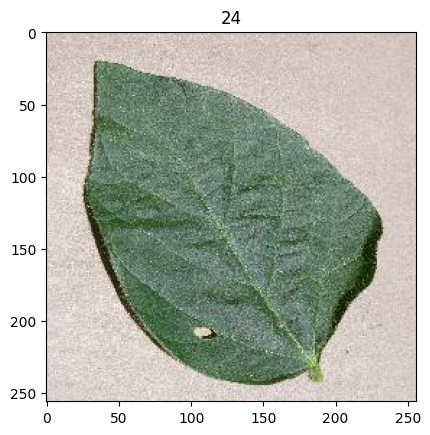

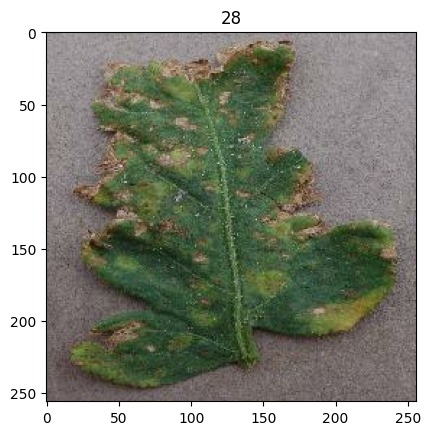

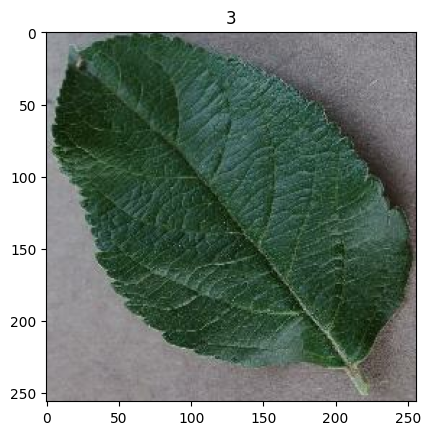

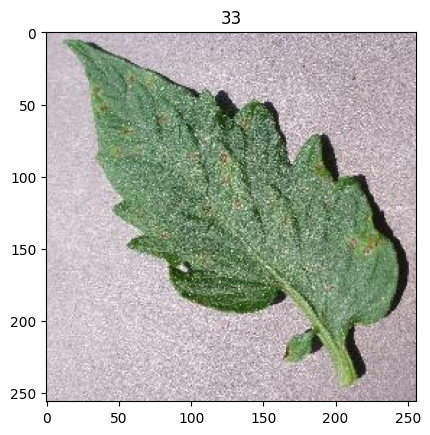

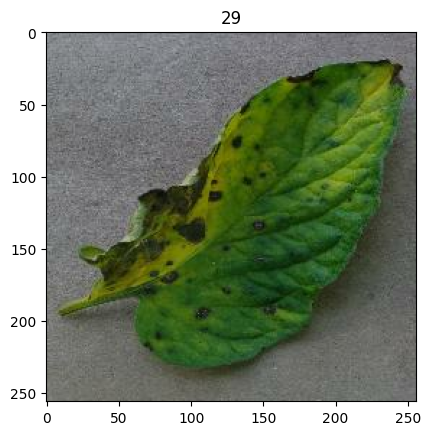

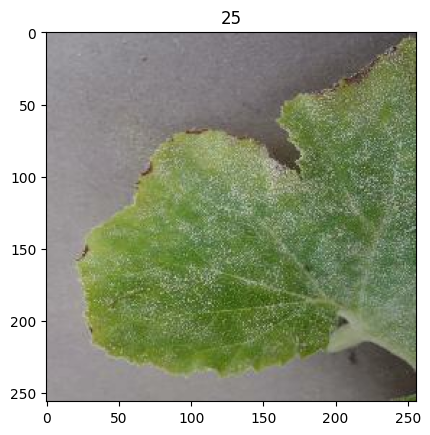

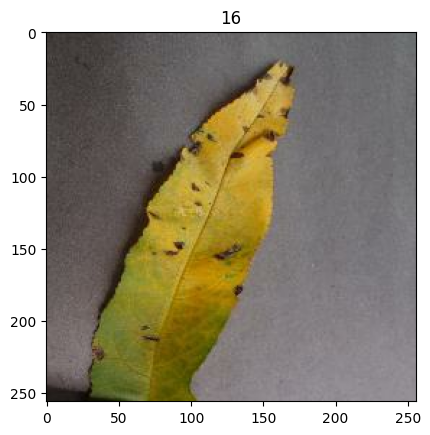

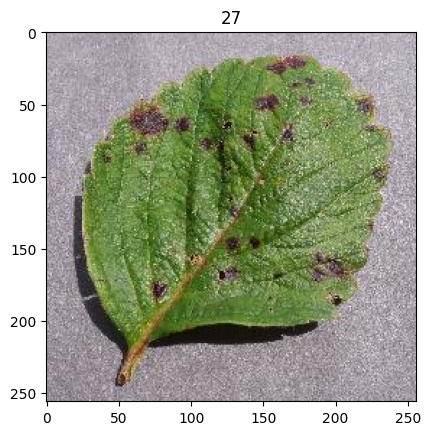

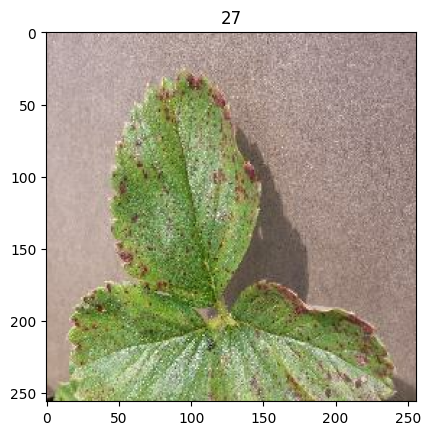

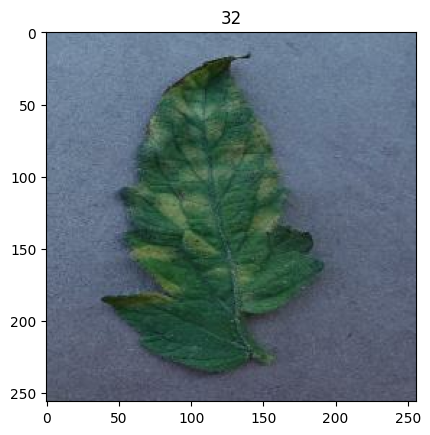

In [5]:


for image, label in ds.take(10):
    plt.imshow(image.numpy())
    plt.title(label.numpy())
    plt.show()

# Preprocessing

2023-04-20 14:53:12.615114: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [8]
	 [[{{node Placeholder/_2}}]]
2023-04-20 14:53:12.615503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [8]
	 [[{{node Placeholder/_4}}]]


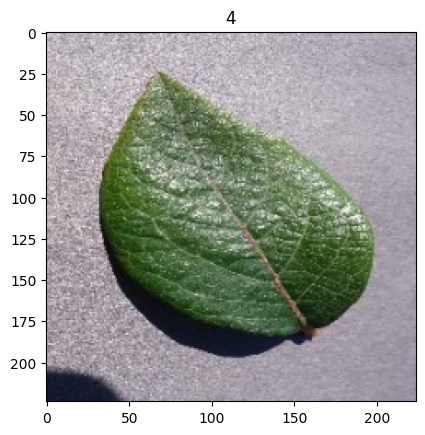

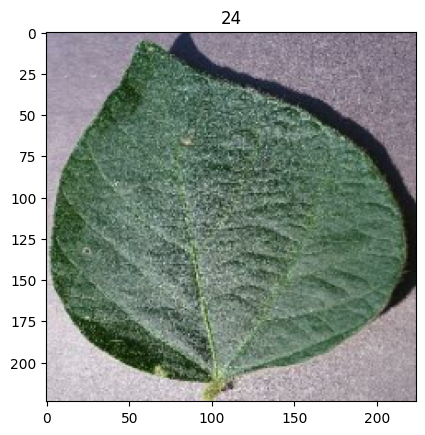

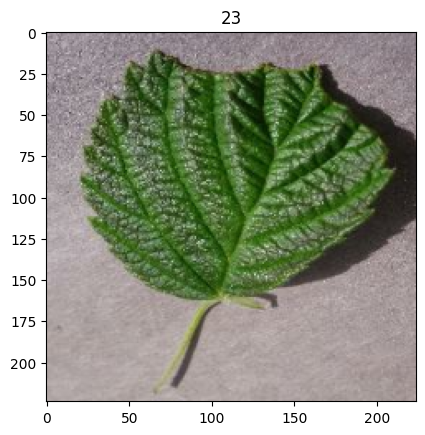

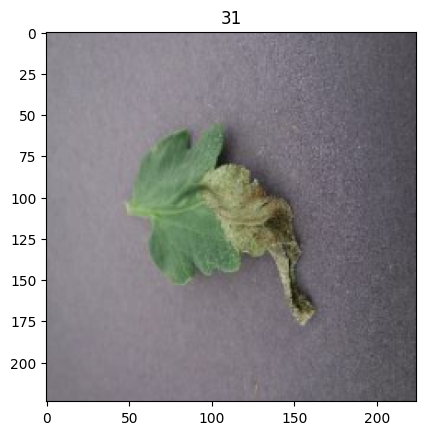

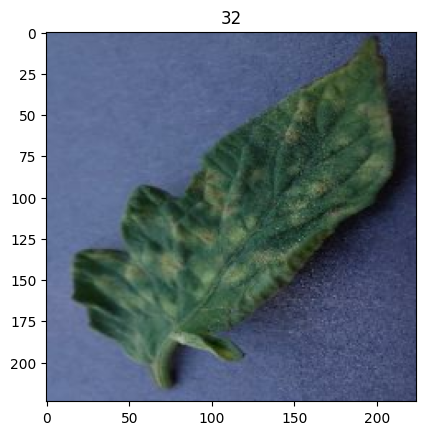

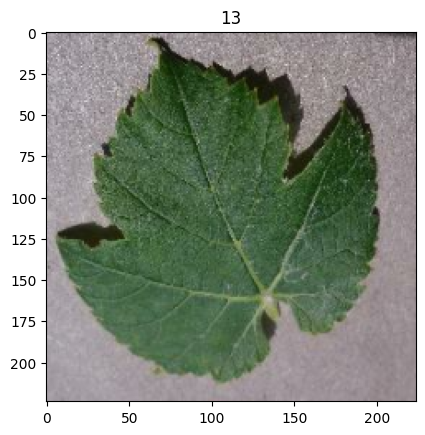

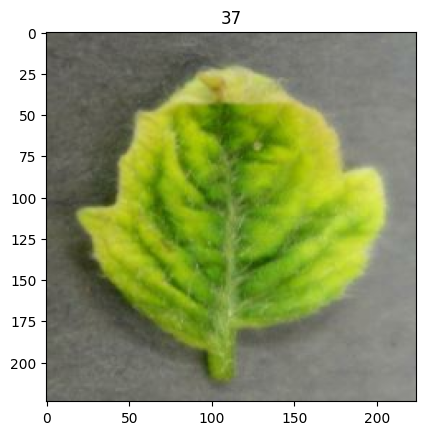

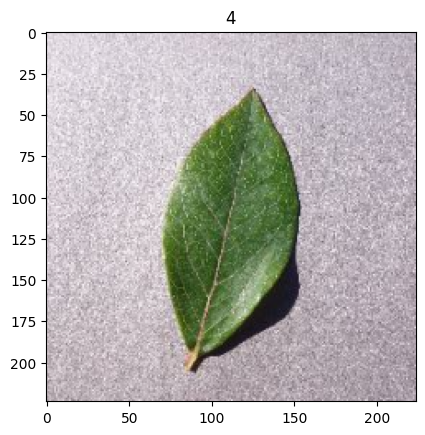

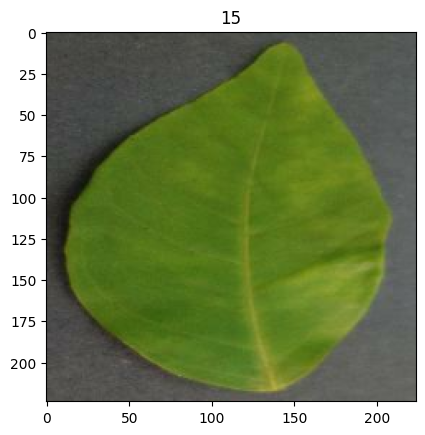

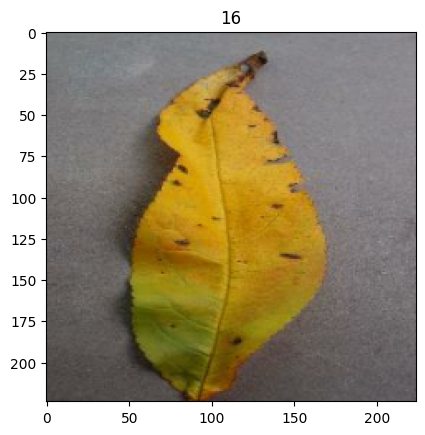

0.0
0.89669883


In [6]:
IMG_SIZE = 224

# Define a function to preprocess the images
def preprocess_image(image, label):
    # Convert the image to float32
    image = tf.cast(image, tf.float32)
    # Normalize the pixel values
    image = image / 255.0
    # Resize the image to the target size
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    # Return the preprocessed image and label
    return image, label

ds = ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
assert isinstance(ds, tf.data.Dataset)

for image, label in ds.take(10):
    plt.imshow(image.numpy())
    plt.title(label.numpy())
    plt.show()
    
# print the minimum and maximum pixel values
print(np.min(image))
print(np.max(image))

## splitting the dataset into train and testing

In [7]:
# Get the total number of examples in the dataset
num_examples = info.splits['train'].num_examples
print("This is the number of images or examples we have in our dataset: ", num_examples)

This is the number of images or examples we have in our dataset:  54303


In [8]:
# Define the sizes of the training and testing sets
train_size = int(0.6 * num_examples)
val_size = int(0.2 * num_examples)
test_size = num_examples - train_size - val_size
print("Train size: ", train_size)
print("Validation size: ", val_size)
print("Test size: ", test_size)

Train size:  32581
Validation size:  10860
Test size:  10862


In [9]:
# Split the dataset into training and testing sets
ds_train = ds.take(train_size)
ds_val = ds.skip(train_size).take(val_size)
ds_test = ds.skip(train_size + val_size)

In [10]:
assert isinstance(ds_train, tf.data.Dataset)
print("----------------------ASSERT TRAIN----------------------\n")
print(ds_train)

assert isinstance(ds_val, tf.data.Dataset)
print("----------------------ASSERT VAL----------------------\n")
print(ds_test)

assert isinstance(ds_test, tf.data.Dataset)
print("----------------------ASSERT TEST----------------------\n")
print(ds_test)



----------------------ASSERT TRAIN----------------------

<_TakeDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
----------------------ASSERT VAL----------------------

<_SkipDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
----------------------ASSERT TEST----------------------

<_SkipDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [11]:
ds_train = ds_train.batch(32).prefetch(1)
tfds.benchmark(ds_train, batch_size=32)

ds_val = ds_val.batch(32).prefetch(1)
tfds.benchmark(ds_val, batch_size=32)

ds_test = ds_test.batch(32).prefetch(1)
tfds.benchmark(ds_test, batch_size=32)



************ Summary ************



2023-04-20 14:53:14.522533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8]
	 [[{{node Placeholder/_0}}]]
2023-04-20 14:53:14.523960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [8]
	 [[{{node Placeholder/_2}}]]


  0%|          | 0/1019 [00:00<?, ?it/s]

Examples/sec (First included) 3818.14 ex/sec (total: 32640 ex, 8.55 sec)
Examples/sec (First only) 427.38 ex/sec (total: 32 ex, 0.07 sec)
Examples/sec (First excluded) 3848.11 ex/sec (total: 32608 ex, 8.47 sec)

************ Summary ************



2023-04-20 14:53:23.067791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [8]
	 [[{{node Placeholder/_2}}]]
2023-04-20 14:53:23.068222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [8]
	 [[{{node Placeholder/_1}}]]


  0%|          | 0/340 [00:00<?, ?it/s]

Examples/sec (First included) 1277.36 ex/sec (total: 10912 ex, 8.54 sec)
Examples/sec (First only) 5.50 ex/sec (total: 32 ex, 5.82 sec)
Examples/sec (First excluded) 3996.57 ex/sec (total: 10880 ex, 2.72 sec)

************ Summary ************



2023-04-20 14:53:31.613042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [8]
	 [[{{node Placeholder/_2}}]]
2023-04-20 14:53:31.613545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [8]
	 [[{{node Placeholder/_4}}]]


  0%|          | 0/340 [00:00<?, ?it/s]

Examples/sec (First included) 1211.63 ex/sec (total: 10912 ex, 9.01 sec)
Examples/sec (First only) 4.90 ex/sec (total: 32 ex, 6.53 sec)
Examples/sec (First excluded) 4389.43 ex/sec (total: 10880 ex, 2.48 sec)


BenchmarkResult(stats=             duration  num_examples          avg
first+lasts  9.006041         10912  1211.631152
first        6.527357            32     4.902443
lasts        2.478684         10880  4389.426374, raw_stats=                      duration
start_time        12943.049907
first_batch_time  12949.577264
end_time          12952.055948
num_iter            340.000000)

In [12]:
# use this to veryfy training sets but uneccesarry right now with low computing power

#print("Number of examples in training set: ", len(list(ds_train)))
#print("Number of examples in testing set: ", len(list(ds_test)))

# Load a pre trained model - for us VGG16

In [13]:
# load in pre trained model
vgg16_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling=None,
)


58889256/58889256 [==============================] - 5s 0us/step


In [14]:
# Freeze all the layers in the base VGG16 model so they will not be trained
for layer in vgg16_model.layers:
    layer.trainable = False


In [15]:
# Add your own classification layers on top of VGG16num_classes = info.features['label'].num_classes

num_classes = info.features['label'].num_classes

model = tf.keras.models.Sequential([
    vgg16_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [16]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)



In [17]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 38)                9766      
                                                                 
Total params: 21,147,238
Trainable params: 6,432,550
Non-trainable params: 14,714,688
_________________________________________________________________


In [18]:
# Train the model
num_epochs = 10
history = model.fit(ds_train, epochs=num_epochs, validation_data=ds_val)

# Evaluate the model
test_loss, test_acc = model.evaluate(ds_test)
print('Test accuracy:', test_acc)

Epoch 1/10


/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-04-20 14:53:57.279462: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 392.00MiB (rounded to 411041792)requested by op sequential/vgg16/block1_conv1/Relu
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-04-20 14:53:57.279562: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2023-04-20 14:53:57.279607: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 56, Chunks in use: 55. 14.0KiB 

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential/vgg16/block1_conv1/Relu' defined at (most recent call last):
    File "/home/tk/miniconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/tk/miniconda3/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/tk/miniconda3/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/home/tk/miniconda3/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/home/tk/miniconda3/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_33876/97056877.py", line 3, in <module>
      history = model.fit(ds_train, epochs=num_epochs, validation_data=ds_val)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/home/tk/Documents/AI_Final_Project/plant_env/lib/python3.10/site-packages/keras/backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential/vgg16/block1_conv1/Relu'
OOM when allocating tensor with shape[32,64,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/vgg16/block1_conv1/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_5153]